### Rephrase PySR equation in a more physical way

In [1]:
import numpy as np
import sympy as sp

**Phrasing I1 as a Taylor expansion around (RH_0, T_0)**

In [2]:
[a1,a2,a3,a4,a5,a6,a7] = [2.03, 6.588e-4, 3.969e-4, 0.3387, 42.246, 0.189586, 22.026]

RH, T, RH_0, T_0, c1, c2, c3, c4, c5, c6, c7 = sp.symbols('RH T RH_0 T_0 c1 c2 c3 c4 c5 c6 c7')

# The function I1 and a Taylor Expansion around (RH_0, T_0)
sp_I1 = a1*RH**2 + (a2*RH - a3)*T**2 - a4*RH*T + a5*RH + a6*T - a7
sp_taylor = sp_I1.subs([(RH, RH_0), (T, T_0)]) + c1*(RH-RH_0) + c2*(T-T_0) + c3*(T-T_0)*(RH-RH_0) + 1/2*c4*(T-T_0)**2 + 1/2*c5*(RH-RH_0)**2 + 1/2*c6*(T-T_0)**2*(RH-RH_0)

In [186]:
# Expand around RH_0 = 0 (alternatively RH_0 = 1). We could further specify to expand T_0 around its mean: (T_0, 2.57065512e+02)
sp_taylor_0 = sp_taylor.subs([(RH_0, 0), (T_0, 257)])

# Those two should be equal when viewed as polynomials in [RH, T]
pol_diff = sp.poly(sp_taylor_0 - sp_I1, [RH, T])

sol_taylor = sp.solve(pol_diff.coeffs())

# This should be precisely I1
sp.expand(sp_taylor_0.subs(sol_taylor))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.3387*RH*T + 42.246*RH - 0.0003969*T**2 + 0.189586*T - 22.026

In [81]:
sol_taylor

{c5: 4.06000000000000,
 c1: -1.28681880000000,
 c3: -7.68000000000000e-5,
 c6: 0.00131760000000000,
 c2: -0.0144206000000000,
 c4: -0.000793800000000000}

In [183]:
# Expand around RH_0 = 1. We could further specify to expand T_0 around its mean: (T_0, 2.57065512e+02)
sp_taylor_0 = sp_taylor.subs([(RH_0, 1), (T_0, 257)])

# Those two should be equal when viewed as polynomials in [RH, T]
pol_diff = sp.poly(sp_taylor_0 - sp_I1, [RH, T])

sol_taylor = sp.solve(pol_diff.coeffs())

# This should be precisely I1
sp.expand(sp_taylor_0.subs(sol_taylor))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.3387*RH*T + 42.246*RH - 0.0003969*T**2 + 0.189586*T - 22.026

In [184]:
sol_taylor

{c1: 2.77318120000000,
 c2: -0.0144974000000000,
 c3: -7.68000000000000e-5,
 c4: 0.000523800000000000,
 c5: 4.06000000000000,
 c6: 0.00131760000000000}

In [126]:
# Expand around RH_0 = 0 (alternatively RH_0 = 1). We could further specify to expand T_0 around its mean: (T_0, 2.57065512e+02)
sp_taylor_0 = sp_taylor.subs([(RH_0, 0)])

# Those two should be equal when viewed as polynomials in [RH, T]
pol_diff = sp.poly(sp_taylor_0 - sp_I1, [RH, T])

sol_taylor = sp.solve(pol_diff.coeffs())

# This should be precisely I1
sp.expand(sp_taylor_0.subs(sol_taylor))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.3387*RH*T + 42.246*RH - 0.0003969*T**2 + 1.11022302462516e-16*T*c3 + 0.189586*T - 5.6843418860808e-14*c3**2 - 5.6843418860808e-14*c3 - 22.026

In [127]:
sol_taylor

{c5: 4.06000000000000,
 c4: -0.000793800000000000,
 c6: 0.00131760000000000,
 T_0: 758.955676988464*c3 + 257.058287795993,
 c2: -0.602459016393443*c3 - 0.014466868852459,
 c1: 379.477838494232*c3**2 - 1.28682103825137}

In [144]:
# Expand around RH_0 = 0 (alternatively RH_0 = 1). We could further specify to expand T_0 around its mean: (T_0, 2.57065512e+02)
sp_taylor_0 = sp_taylor.subs([(RH_0, 1), (T_0, 257.058)])

# Those two should be equal when viewed as polynomials in [RH, T]
pol_diff = sp.poly(sp_taylor_0 - sp_I1, [RH, T])

sol_taylor = sp.solve(pol_diff.coeffs())

# This should be precisely I1
sp.expand(sp_taylor_0.subs(sol_taylor))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.3387*RH*T + 42.246*RH - 0.0003969*T**2 + 0.189586*T - 22.026

In [145]:
sol_taylor

{c1: 2.77317896180320,
 c2: -0.0144670196000000,
 c3: -3.79200000000000e-7,
 c4: 0.000523800000000000,
 c5: 4.06000000000000,
 c6: 0.00131760000000000}

Missing one term:

In [172]:
sp_I1.subs([(RH, 1), (T, 257.058)])

1.22509513183160

Is the following the perfect solution?

In [10]:
# Expand around RH_0 = 0 (alternatively RH_0 = 1). We could further specify to expand T_0 around its mean: (T_0, 257.065512)
# (RH_0, 0.602459016393443) is also interesting!
sp_taylor_0 = sp_taylor.subs([(RH_0, 0.6025), (T_0, 257.06)])

# Those two should be equal when viewed as polynomials in [RH, T]
pol_diff = sp.poly(sp_taylor_0 - sp_I1, [RH, T])

sol_taylor = sp.solve(pol_diff.coeffs())

# # This should be precisely I1
# sp.expand(sp_taylor_0.subs(sol_taylor))

In [11]:
sol_taylor

{c1: 1.15932896368000,
 c2: -0.0144668687600000,
 c3: 2.25600000000000e-6,
 c4: 5.40000000000000e-8,
 c5: 4.06000000000000,
 c6: 0.00131760000000000}

In [12]:
sp_I1.subs([(RH, 0.6025), (T, 257.06)])

0.443480248277199

In [264]:
# Double-checking
sp.expand((sp_I1.subs([(RH, RH_0), (T, T_0)]) + 1.159329007*(RH-RH_0) - 0.0144668693*(T-T_0) + 1/2*4.06*(RH-RH_0)**2 + \
 + 1/2*0.0013176*(T-T_0)**2*(RH-RH_0)).subs([(RH_0, 0.6025), (T_0, 257.05)]))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.33868908*RH*T + 42.243193014*RH - 0.000396927*T**2 + 0.1895933014*T - 22.0260928079025

In [1]:
RH_0 = 0.602459016393443
T_0 = 257.065512

In [7]:
# Double-checking
sp.expand((sp_I1.subs([(RH, RH_0), (T, T_0)]) + 1.159329007*(RH-RH_0) - 0.0144668693*(T-T_0) + 1/2*4.06*(RH-RH_0)**2 + \
 + 1/2*0.0013176*(T-T_0)**2*(RH-RH_0)).subs([(RH_0, 0.602459016393443), (T_0, 257.065512)]))

2.03*RH**2 + 0.0006588*RH*T**2 - 0.3387095186112*RH*T + 42.2486133109735*RH - 0.0003969*T**2 + 0.1895917341256*T - 22.0275742977113

Additional constants

In [13]:
0.6025 - 1.1593/4.06

0.31695812807881774

In [14]:
0.0013176/(2*4.06)

0.00016226600985221675

**To convert I2 and I3 from the old formulation to the new formulation**

Old: <br>
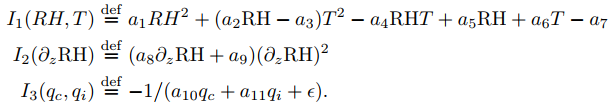

New: <br>
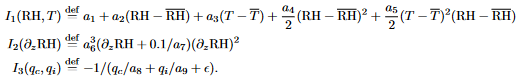

Old coefficients --> New coefficients:
- $-a_7/100 \rightarrow a_1 - a_2R0 - a_3T0 + (a_4/2)\cdot R0^2 - (a_5/2)\cdot T0^2R0$
- $a_5/100 \rightarrow a_2 - a_4\cdot R0 + a_5/2\cdot T0^2$
- $a_6/100 \rightarrow a_3 + a_5\cdot T0\cdot R0$
- $a_1/100 \rightarrow a_4/2$
- $a_2/100 \rightarrow a_5/2$


- $a_8/100 \rightarrow (a_6)^3$
- $a_9/a_8 \rightarrow 0.1/a_7$
- $100a_{10} \rightarrow 1/a_8$
- $100a_{11} \rightarrow 1/a_9$
- $100\epsilon \rightarrow \epsilon$

In [19]:
# Great method to convert from old formulation to the new one!
def convert_coefficients(coefs):
    '''
        Convert 12 original coefficients into 10 new coefficients (all in physical space!).
    '''
    [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, eps] = coefs

    T0 = 257.06
    R0 = 0.6025
    
    # We call the new coefficients b_i in this method
    b5 = 2/100*a2
    b4 = 2/100*a1
    b3 = a6/100 - b5*T0*R0
    b2 = a5/100 + b4*R0 - b5/2*T0**2
    b1 = -a7/100 + b2*R0 + b3*T0 - (b4/2)*R0**2 + (b5/2)*T0**2*R0
    
    b6 = ((a8/100)**(1/3))
    b7 = (0.1*a8/a9)
    b8 = (1/(100*a10))
    b9 = (1/(100*a11))
    eps_new = (100*eps)
    
    return [b1, b2, b3, b4, b5, b6, b7, b8, b9, eps_new]

convert_coefficients([203, 0.06588, 0.03969, 33.87, 4224.6, 18.9586, 2202.6, 2*10**10, 6*10**7, 8641, 32544, 0.0106])

[0.4413466862656108,
 1.1587490363200033,
 -0.014482109239999985,
 4.0600000000000005,
 0.0013176,
 584.803547642573,
 33.333333333333336,
 1.1572734637194769e-06,
 3.072763028515241e-07,
 1.06]

In [20]:
# Rephrasing I2 once again so that a6 has a meaning (i.e., if RH changes by 
dzRH = sp.symbols('dzRH')

sp.solve(-0.1 + (584.8036)**3*(dzRH + 1/333.33)*dzRH**2)

[-0.00294227309338137 + 0.e-26*I,
 -0.000442122398675507 + 0.e-25*I,
 0.00038436549175687 - 0.e-25*I]

In [19]:
print('this is the new a6:')
0.1/0.00038436549175687

this is the new a6:


260.16903739957723

In [21]:
print('this is the prefactor:')
584.8036/260.16903739957723

this is the prefactor:


2.2477832329518788

In [26]:
(2.25*259.9127)**3*(0.1/259.9127 + 0.1/33.33)*(0.1/259.9127)**2

0.10021655054567957

In [24]:
584.8036/2.25

259.9127111111111

**Empirical joint histogram for (qc, qi)**

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load data
base_path = '/home/b/b309170'
output_path = base_path + '/my_work/icon-ml_data/cloud_cover_parameterization/neighborhood_based_SR_DYAMOND'

input_data = np.load(output_path + '/cloud_cover_input_dyamond.npy')

# To locate variables
features = ['hus', 'clw', 'cli', 'ta', 'pa', 'zg', 'fr_land', 'U', 'rh', 'ps', 'hus_z', 'hus_zz', 'clw_z', 'clw_zz', 'cli_z',\
                  'cli_zz', 'ta_z', 'ta_zz', 'pa_z', 'pa_zz', 'U_z', 'U_zz', 'rh_z', 'rh_zz']
len(features)

loc = {}
for i in range(len(features)):
    loc[features[i]] = i

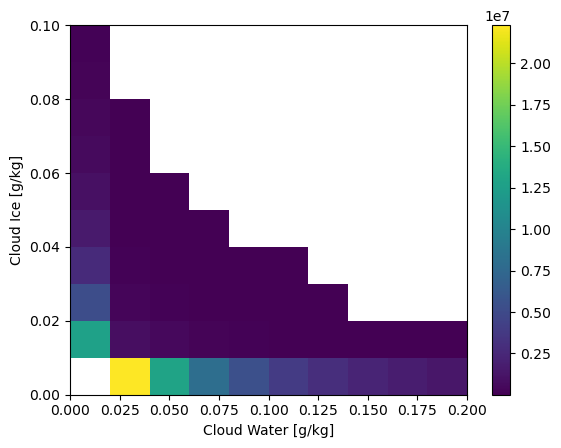

In [55]:
plt.hist2d(x=np.array(input_data[:, loc['clw']])*1000, y=np.array(input_data[:, loc['cli']])*1000, \
           range=[[0,0.2],[0,0.1]], bins=25, cmin=1e4, cmax=1e8)
plt.xlabel('Cloud Water [g/kg]')
plt.ylabel('Cloud Ice [g/kg]')
plt.colorbar()

In [4]:
# Log of density with seaborn
import seaborn as sns
import pandas as pd

In [5]:
# Limit number of samples
M = np.random.randint(0, input_data.shape[0], 4*10**3)
# M2 = np.random.randint(0, input_data.shape[0], 4*10**3)

Text(37.597222222222214, 0.5, 'Cloud Ice [g/kg]')

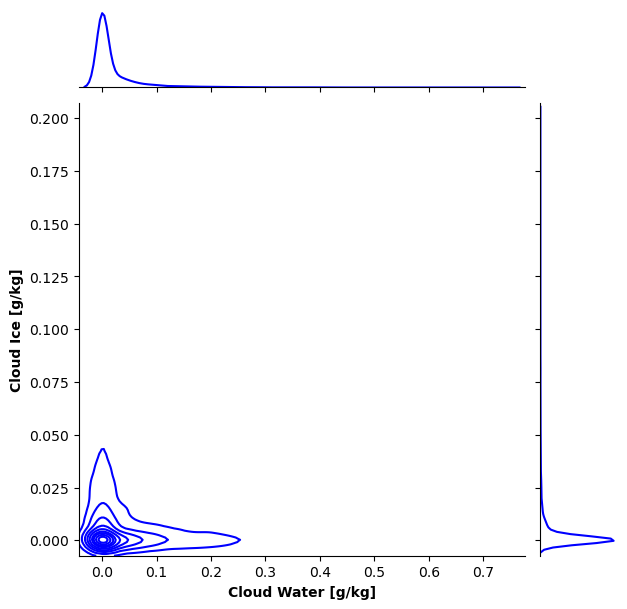

In [6]:
# Joint PDF
X = np.array(input_data[M, loc['clw']])*1000
Y = np.array(input_data[M, loc['cli']])*1000

h = sns.jointplot(x=X, y=Y, color='blue', kind='kde')
# h = sns.jointplot(x=np.array(input_data[M2, loc['clw']])*1000, y=np.array(input_data[M2, loc['cli']])*1000,\
#                   color='orange', kind='kde')
h.ax_joint.set_xlabel('Cloud Water [g/kg]', fontweight='bold')
h.ax_joint.set_ylabel('Cloud Ice [g/kg]', fontweight='bold')

In [7]:
# Are the variables independent?
n = len(Y)

# cov(X, Y)
Z = (np.sum((X - np.mean(X)) * (Y - np.mean(Y)))) * 1/(n-1)
pearson = Z / (np.std(X) * np.std(Y))

print('Correlation: %.6f'%Z)
print('Pearson Correlation: %.6f'%pearson)

Correlation: -0.000040
Pearson Correlation: -0.074611


**Approximate marginals**

In [55]:
M = np.random.randint(0, input_data.shape[0], 5*10**7)

X = np.array(input_data[M, loc['clw']])*1000
Y = np.array(input_data[M, loc['cli']])*1000

In [13]:
# Increase the general font size
import matplotlib
matplotlib.rcParams['legend.fontsize'] = 'x-large'
matplotlib.rcParams['axes.labelsize'] = 'x-large' # For an axes xlabel and ylabel
matplotlib.rcParams['axes.titlesize'] = 'x-large'
matplotlib.rcParams['xtick.labelsize'] = 'xx-large'
matplotlib.rcParams['ytick.labelsize'] = 'xx-large'

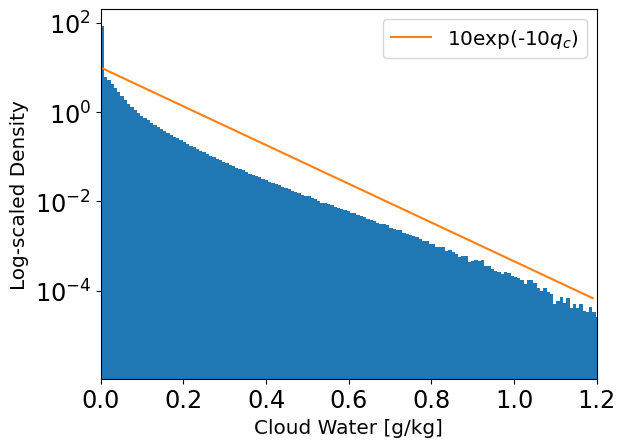

In [70]:
# sns.kdeplot(X)
plt.hist(X, bins=200, density=True)
plt.xlim([0, 1.2])
plt.yscale('log')
plt.xlabel('Cloud Water [g/kg]')

# Trying to approximate it
x_f = np.arange(0, 1.2, 1e-2)
# plt.plot(x_f, 4*(1+x_f)**(-15))
plt.plot(x_f, 10*np.exp(-10*x_f))

plt.legend(['10exp(-10$q_c$)'])
plt.ylabel('Log-scaled Density')
plt.savefig('cloud_water_dyamond.pdf', bbox_inches='tight')

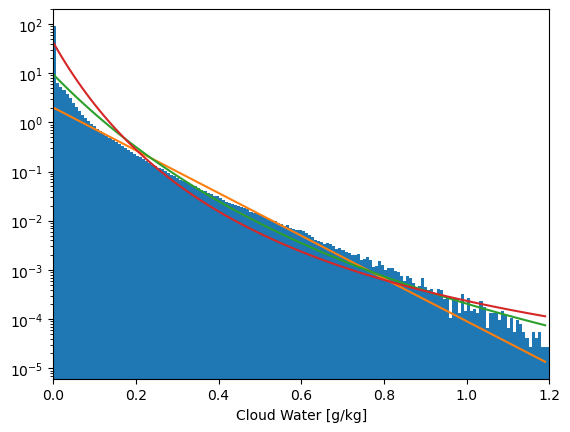

In [44]:
A = 0
B = 1.2

# sns.kdeplot(X)
plt.hist(X, bins=200, density=True)
plt.xlim([A, B])
plt.yscale('log')
plt.xlabel('Cloud Water [g/kg]')

# Trying to approximate it
x_f = np.arange(A, B, 1e-2)
# plt.plot(x_f, 4*(1+x_f)**(-15))
plt.plot(x_f, 2*np.exp(-10*x_f))
# plt.plot(x_f, 10**((-6.4947*x_f + 0.8866)/(x_f + 0.5456)))
plt.plot(x_f, np.exp((2.62679 - 21.0337*x_f)/(1.1689 + x_f)))
plt.plot(x_f, np.exp((2.04147 - 14.9546*x_f)/(0.5456 + x_f)))

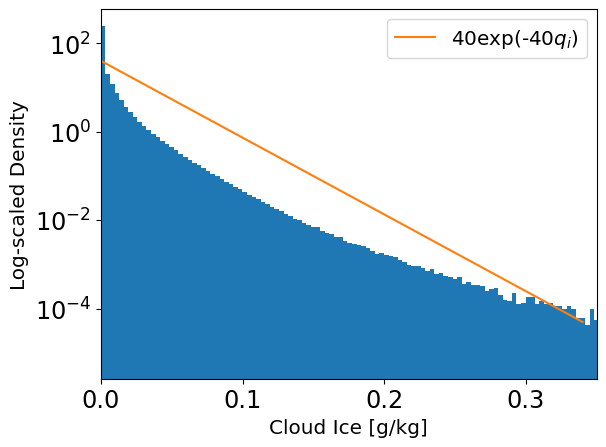

In [69]:
A = 0
B = 0.35

# sns.kdeplot(X)
plt.hist(Y, bins=200, density=True)
plt.xlim([A, B])
plt.yscale('log')
plt.xlabel('Cloud Ice [g/kg]')

# Trying to approximate it
x_f = np.arange(A, B, 1e-2)
# plt.plot(x_f, np.exp((0.758932 - 16.7345*x_f)/(0.1927 + x_f)))

plt.plot(x_f, 40*np.exp(-40*x_f))

plt.legend(['40exp(-40$q_i$)'])
plt.ylabel('Log-scaled Density')
plt.savefig('cloud_ice_dyamond.pdf', bbox_inches='tight')

**Distributions of storm-scale cloud ice/water**

In [12]:
import os
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

import time

In [2]:
DS_clw = xr.open_dataset('/work/ka1081/DYAMOND_WINTER/MPIM-DWD-DKRZ/ICON-NWP-2km/DW-ATM/atmos/3hr/clw/r1i1p1f1/ml/gn/clw_3hr_ICON-NWP-2km_DW-ATM_r1i1p1f1_ml_gn_20200216030000-20200216210000.nc')
DS_cli = xr.open_dataset('/work/ka1081/DYAMOND_WINTER/MPIM-DWD-DKRZ/ICON-NWP-2km/DW-ATM/atmos/3hr/cli/r1i1p1f1/ml/gn/cli_3hr_ICON-NWP-2km_DW-ATM_r1i1p1f1_ml_gn_20200216030000-20200216210000.nc')

In [10]:
t0 = time.time()

# Good geographical coverage by taking every 3500th location
# Only take cells below 21km 
X = np.array(DS_clw.clw[:,21:,::3500])*1000 # convert to g/kg
Y = np.array(DS_cli.cli[:,21:,::3500])*1000

# Aiming for 10**8
print(X.size)

time.time() - t0

9395456


468.571937084198

In [15]:
X = np.reshape(X, -1)
Y = np.reshape(Y, -1)

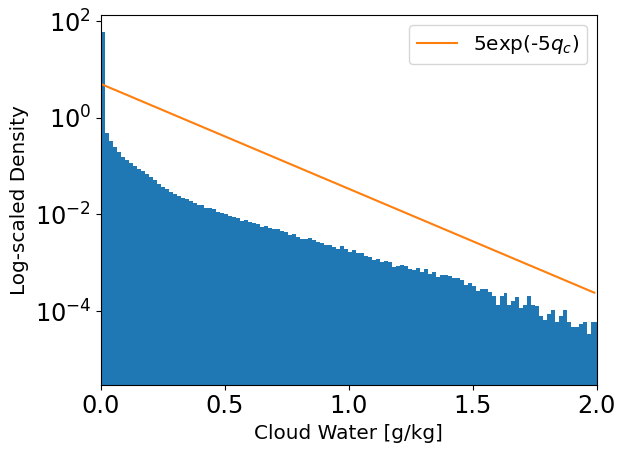

In [27]:
# sns.kdeplot(X)
plt.hist(X, bins=200, density=True)
plt.xlim([0, 2])
plt.yscale('log')
plt.xlabel('Cloud Water [g/kg]')

# Trying to approximate it
x_f = np.arange(0, 2, 1e-2)
# plt.plot(x_f, 4*(1+x_f)**(-15))
plt.plot(x_f, 5*np.exp(-5*x_f))

plt.legend(['5exp(-5$q_c$)'])
plt.ylabel('Log-scaled Density')
plt.savefig('storm_scale_cloud_water_dyamond.pdf', bbox_inches='tight')

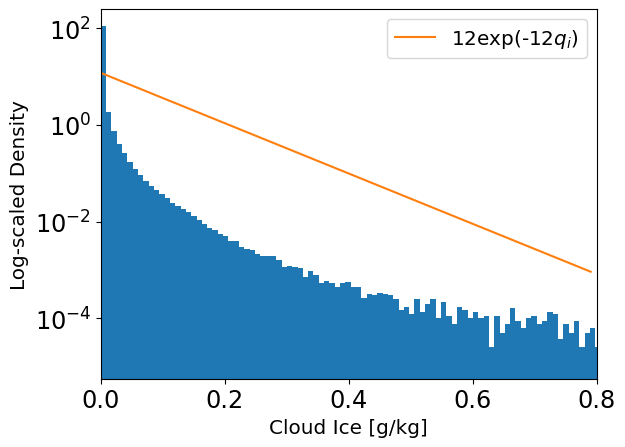

In [39]:
A = 0
B = 0.8

# sns.kdeplot(X)
plt.hist(Y, bins=200, density=True)
plt.xlim([A, B])
plt.yscale('log')
plt.xlabel('Cloud Ice [g/kg]')

# Trying to approximate it
x_f = np.arange(A, B, 1e-2)
# plt.plot(x_f, np.exp((0.758932 - 16.7345*x_f)/(0.1927 + x_f)))

plt.plot(x_f, 12*np.exp(-12*x_f))

plt.legend(['12exp(-12$q_i$)'])
plt.ylabel('Log-scaled Density')
plt.savefig('storm_scale_cloud_ice_dyamond.pdf', bbox_inches='tight')